# Backtracking

A lot of overlap with DFS - its a brute-force approach and try all solutions like DFS but backtrack when we hit a dead end.

## Problem: Find a valid path

> Q: Given a binary tree, we want to determine if there exists a path from the root to a leaf node without having a value of `0` in the path. If such a path exists, we return `true`, otherwise we return `false`. We assume there exists only one such path.

We try using DFS. Our constraint is that we cannot have a node with value `0` in our path. We also know that if the tree is empty, then there cannot exist a valid path either. Finally, if we reach a leaf node we can return true since it means there is a path that exists from root to leaf.

1. We can arbitrarily choose to explore the left-subtree first.
2. If the left-subtree returns `true`, we can return `true` as well.
3. If the left-subtree returns `false`, we can explore the right-subtree.
4. If the right-subtree returns `true`, we can return `true` as well.
5. If both the left and right subtrees return false, then we have to return `false`

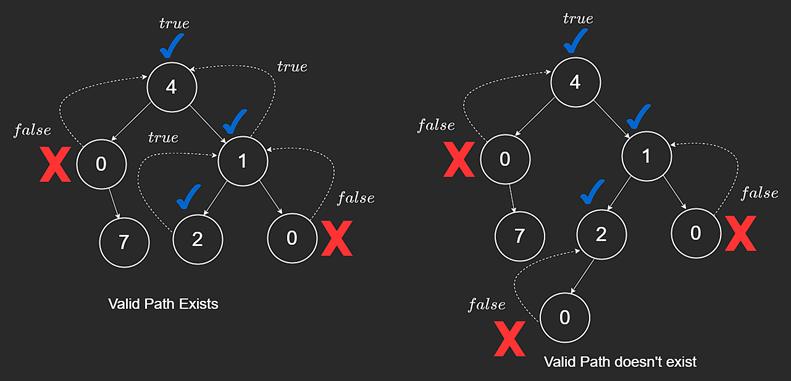

In [3]:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None

def canReachLeaf(root):
    #if youve checked a null node or root.val==0
    if not root or root.val == 0:
        return False
    
    #reached a leaf node with no children at all
    if not root.left and not root.right:
        return True
    #recursively call left subtree
    if canReachLeaf(root.left):
        return True
    #if recursively call right subtree
    if canReachLeaf(root.right):
        return True
    
    #at this point, all the previous calls have been False
    return False

### Building the Path

Instead of returning `true` or `false`, we can build up the path and show the history travelled so far. We use a stack that increases as we traverse deeper, and pops stuff out as we backtrack

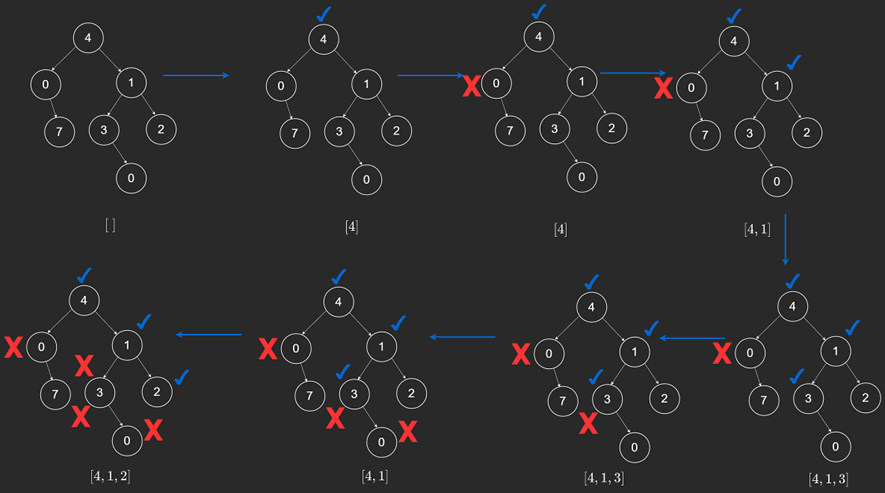

In [4]:
def leafPath(root, path):
    print(path)
    if not root or root.val == 0:
        return False
    path.append(root.val)

    if not root.left and not root.right:
        return True
    if leafPath(root.left, path):
        return True
    if leafPath(root.right, path):
        return True
    #backtrack
    path.pop()
    return False

In [7]:
root=TreeNode(4)
root.left=TreeNode(0)
root.left.right=TreeNode(7)

root.right=TreeNode(1)
root.right.right=TreeNode(2)
root.right.left=TreeNode(3)
root.right.left.right=TreeNode(0)

print('final is outcome is',leafPath(root,[]))

[]
[4]
[4]
[4, 1]
[4, 1, 3]
[4, 1, 3]
[4, 1]
final is outcome is True


---

### Time Complexity

Given that the tree has `n` nodes, the time complexity will be $O(n)$ because in the worst case we may need to visit all the nodes in the tree.

### Space Complexity

The space complexity is `h`, the height of the tree. This is because we are using recursion and the maximum depth of the recursion is the height of the tree.

We are also storing the nodes along the path in the path list, which will have a maximum of $O(h)$ elements at any given time.

---


## Problem: Subsets

Given an integer array `nums` of unique elements, return all possible subsets (order isnt impt)

The solution set must not contain duplicate subsets. Return the solution in any order.

> In total we have $2^n$ subsets where $n$ is the length of the array. This is because for every item, we can either choose to include or not include it, so we have 2*2*2... different combinations of whether we choose to include it.

Here's an example with the set `[1,2,3]`: at each layer we simply decide whether to add or not add the element we're considering. The solution is closer to BFS than DFS.


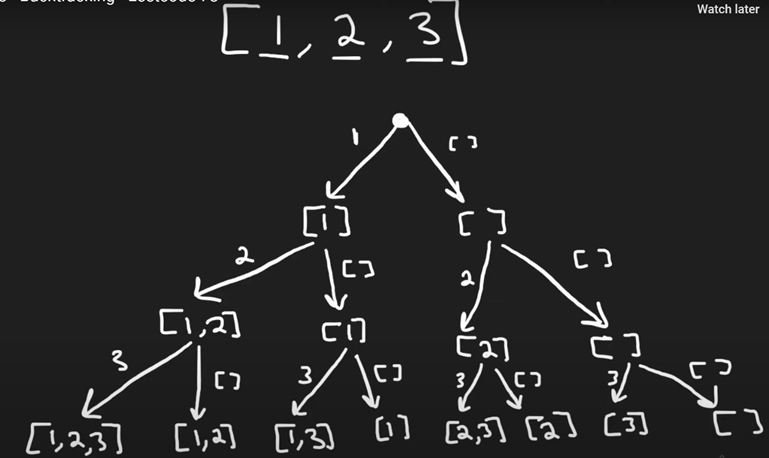

In [26]:
#mysol
def subsets(nums):
    #this is the history of arrangements that well return
    res = []
    #since this function is defined inside, we by default can access the variables outside it
    def dfs(i, sub):
        #terminate when i one index over the end
        if i==len(nums):
            res.append(sub)
            return
        #this is the subset after adding i, before the next i
        with_i=sub[:]
        with_i.append(nums[i])
        dfs(i+1,with_i)

        #this is the subset after not adding i
        dfs(i+1,sub)
    
    dfs(0,[])
    return res
    

In [ ]:
def subsets(nums):
    res = []

    subset = []

    def dfs(i):
        if i >= len(nums):
            res.append(subset.copy())
            return
        subset.append(nums[i])
        dfs(i + 1)
        #this is literally just without the new elem, very similar to mine
        subset.pop()
        dfs(i + 1)

    dfs(0)
    return res

In [27]:
print(subsets([1,2,3]))

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]


---

## Problem: Combination Target Sum

You are given an array of distinct integers `nums` and a target integer `target`. Your task is to return a list of all *unique combinations* of nums where the chosen numbers sum to `target`.

The same number may be chosen from `nums` an *unlimited* number of times. Two combinations are the same if the frequency of each of the chosen numbers is the same, otherwise they are different.

You may return the combinations in any order and the order of the numbers in each combination can be in any order.

> This is literally just DP unbounded knapsack. Same as Coin Change 2

In [1]:
def comboSum(nums, target):
    res = []
    combo = []

    def dfs(k, currsum):

        i=k%len(nums)

        print(f'Current sum: {currsum}, Current combination: {combo}')
        
        if currsum == target:
            res.append(combo.copy())
            return
        if currsum > target:
            print(f'TERMINATE: Current sum: {currsum}, Current combination: {combo}')
            return
        
        print(f'Trying to add the number {nums[i]} at {k}, real index {i}')

        combo.append(nums[i])
        print('first dfs')
        dfs(k + 1, currsum + nums[i])

        combo.pop()
        print('second dfs')
        dfs(k + 1, currsum)
        print('end loop')


    dfs(k=0, currsum=0)
    return res

In [2]:

def comboSum(nums,target):
    res = []

    def dfs(i, cur, total):
        if total == target:
            res.append(cur.copy())
            return
        if i >= len(nums) or total > target:
            return

        #append this number, and the next number to be added is still this number
        cur.append(nums[i])
        dfs(i, cur, total + nums[i])

        #do not append this current number, the next number adds the next number in the chronological index
        cur.pop()
        dfs(i + 1, cur, total)

    dfs(0, [], 0)
    return res


In [3]:
print(comboSum([2,5,6,9],9))

[[2, 2, 5], [9]]
